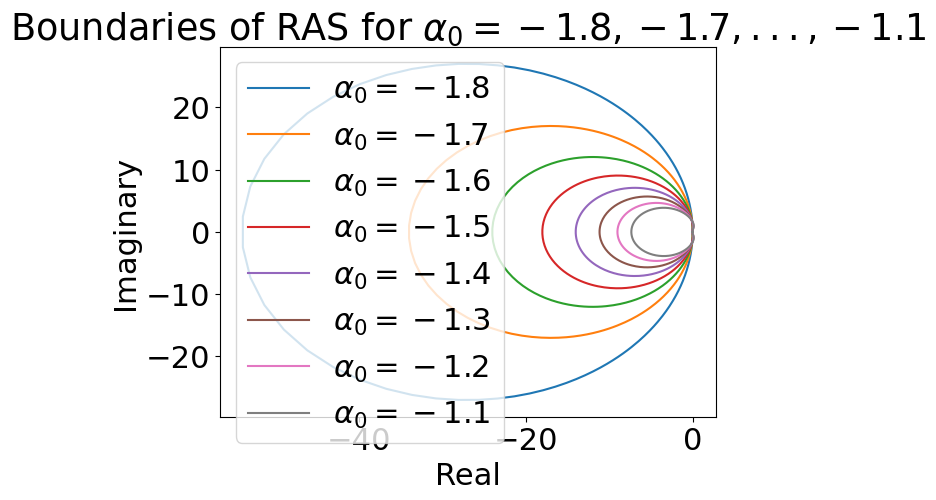

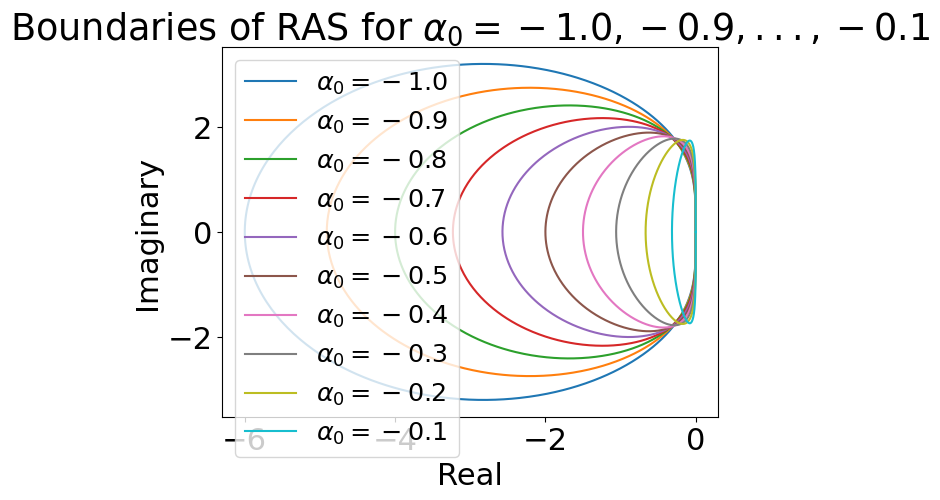

In [130]:
import numpy as np
import matplotlib.pyplot as plt


# Q1(d)


# Define the range of theta values
theta = np.linspace(0, 2*np.pi, 1000)

# Define the range of alpha0 values
alpha0_values1 = np.arange(-1.8, -1.0, 0.1)
alpha0_values2 = np.arange(-1.0, 0.0, 0.1)

# Figure 1: Plot the boundaries of the RAS for alpha0 = -1.8, -1.7, ..., -1.1
plt.figure(1)
for alpha0 in alpha0_values1:
    alpha1 = -1 - alpha0
    beta0 = (2/3 + alpha0/3) * 2
    beta_m1 = (4/3 + alpha0/6) /2
    beta1 = 2 + alpha0 - beta_m1 - beta0
    
    rho = np.exp(1j*theta)**2 + alpha0*np.exp(1j*theta) + alpha1
    sigma = beta_m1*np.exp(1j*theta)**2 + beta0*np.exp(1j*theta) + beta1
    
    h_lambda = rho / sigma
    
    plt.plot(h_lambda.real, h_lambda.imag, label=f'$\\alpha_0 = {alpha0:.1f}$')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Boundaries of RAS for $\\alpha_0 = -1.8, -1.7, ..., -1.1$')
plt.legend(loc='best')

# Figure 2: Plot the boundaries of the RAS for alpha0 = -1.0, -0.9, ..., -0.1
plt.figure(2)
for alpha0 in alpha0_values2:
    alpha1 = -1 - alpha0
    beta0 = 4/3 + alpha0 * 2/3
    beta_m1 = (2 + alpha0/2 - beta0) / 2
    beta1 = 2 + alpha0 - beta_m1 - beta0
    
    rho = np.exp(1j*theta)**2 + alpha0*np.exp(1j*theta) + alpha1
    sigma = beta_m1*np.exp(1j*theta)**2 + beta0*np.exp(1j*theta) + beta1
    
    h_lambda = rho / sigma
    
    plt.plot(h_lambda.real, h_lambda.imag, label=f'$\\alpha_0 = {alpha0:.1f}$')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Boundaries of RAS for $\\alpha_0 = -1.0, -0.9, ..., -0.1$')
plt.legend(loc='best')

plt.show()

In [119]:
#q1 (e)
def check_root_condition(alpha0, z):
    alpha1 = -1 - alpha0
    beta0 = (2/3 + alpha0/3) * 2
    beta_m1 = (4/3 + alpha0/6) /2
    beta1 = 2 + alpha0 - beta_m1 - beta0
    
    rho_z = z**2 + alpha0*z + alpha1
    sigma_z = beta_m1*z**2 + beta0*z + beta1
    
    return abs(rho_z) <= abs(sigma_z)


# Check the root condition for each contour in Figure 1
for alpha0 in alpha0_values1:
    z = complex(-5, 0)  # Choose a point inside each contour
    if check_root_condition(alpha0, z):
        print(f"For z = {z}, α0 = {alpha0:.1f}, the RAS lies outside the contour.")
    else:
        print(f"For z = {z}, α0 = {alpha0:.1f}, the RAS lies inside the contour.")

# Check the root condition for each contour in Figure 2
print("\nFigure 2:")
for alpha0 in alpha0_values2:
    z = complex(-1e-2, 0)  # Choose a point inside each contour
    if check_root_condition(alpha0, z):
        print(f"For z = {z}, α0 = {alpha0:.1f}, the RAS lies outside the contour.")
    else:
        print(f"For z = {z}, α0 = {alpha0:.1f}, the RAS lies inside the contour.")

For z = (-5+0j), α0 = -1.8, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.7, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.6, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.5, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.4, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.3, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.2, the RAS lies inside the contour.
For z = (-5+0j), α0 = -1.1, the RAS lies inside the contour.

Figure 2:
For z = (-0.01+0j), α0 = -1.0, the RAS lies outside the contour.
For z = (-0.01+0j), α0 = -0.9, the RAS lies outside the contour.
For z = (-0.01+0j), α0 = -0.8, the RAS lies outside the contour.
For z = (-0.01+0j), α0 = -0.7, the RAS lies inside the contour.
For z = (-0.01+0j), α0 = -0.6, the RAS lies inside the contour.
For z = (-0.01+0j), α0 = -0.5, the RAS lies inside the contour.
For z = (-0.01+0j), α0 = -0.4, the RAS lies inside the contour.
For z = (-0.01+0j), α0 = -0.3, the RAS lies inside

In [120]:
import numpy as np
from numpy.linalg import inv

# Hamiltonian system function
def f(z):
    u, v, x, y = z
    r = np.sqrt(x**2 + y**2)
    return np.array([x / r**3, y / r**3, u, v])

# Jacobian of the system function
def Df(z):
    x, y = z[2], z[3]
    r = np.sqrt(x**2 + y**2)
    return np.array([[0, 0, (3*x**2 / r**5) - 1/r**3, -(3*x*y / r**5)],
                     [0, 0, -(3*x*y / r**5), -(3*y**2 / r**5) - 1/r**3],
                     [1, 0, 0, 0],
                     [0, 1, 0, 0]],)

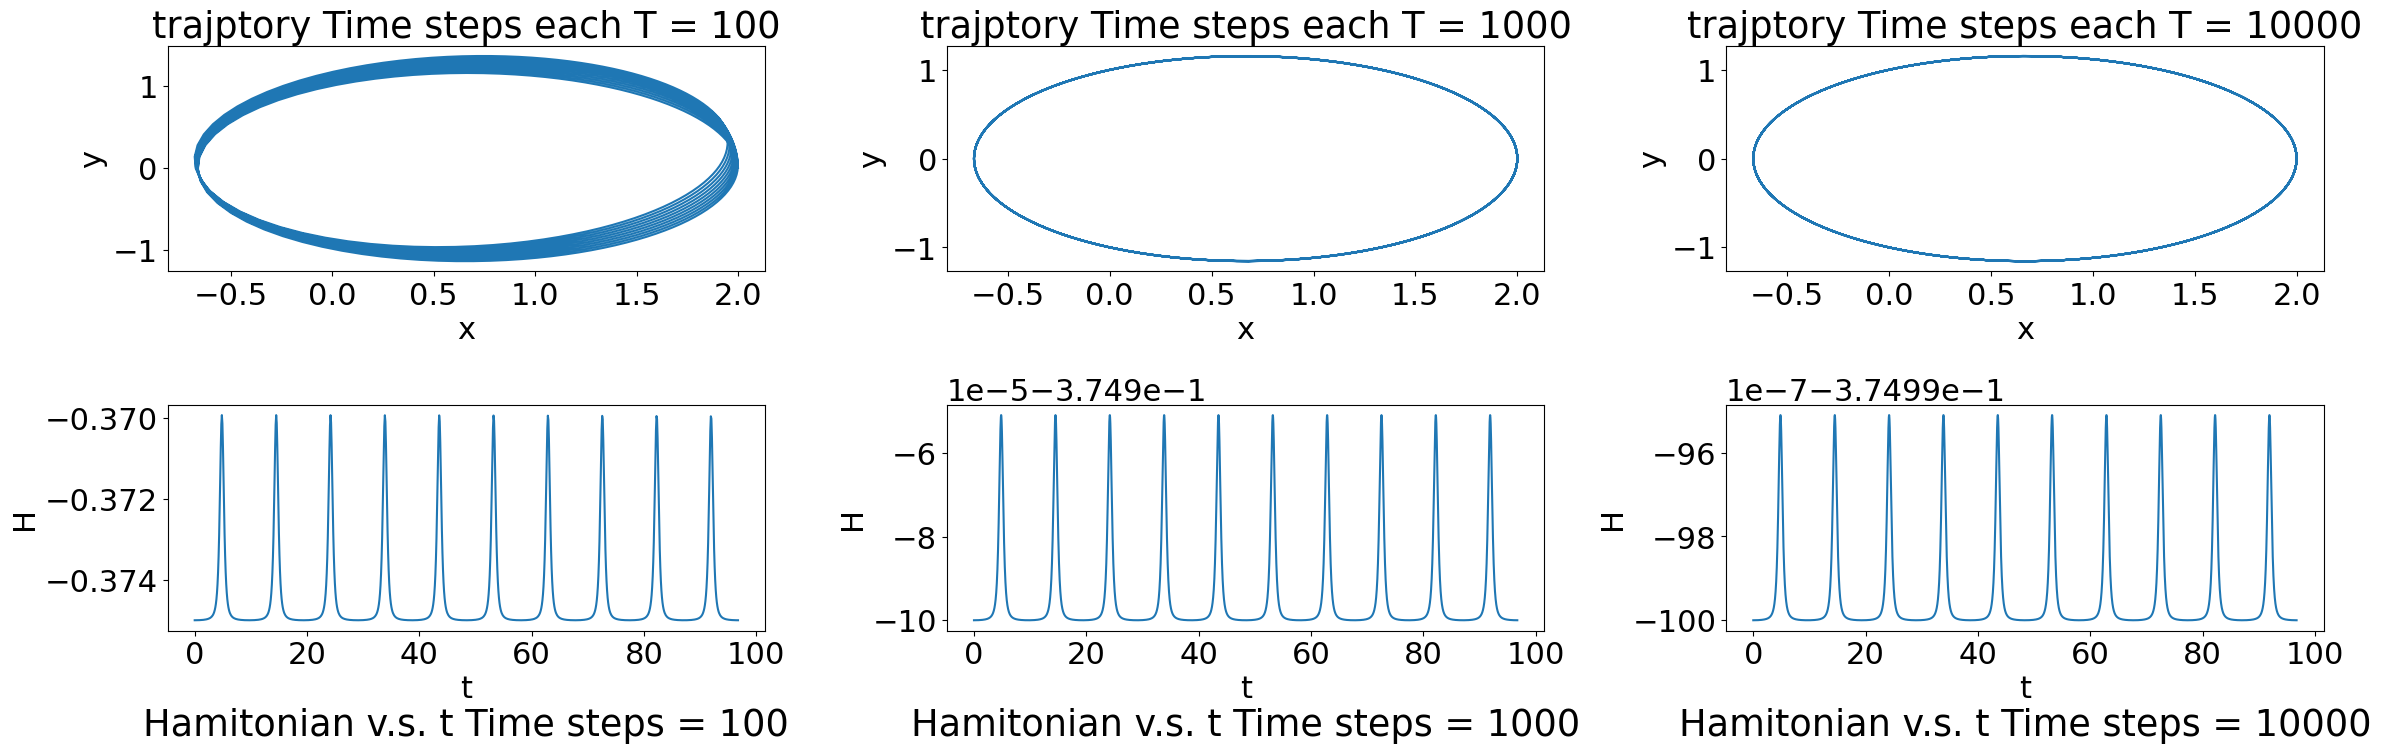

In [121]:
import numpy as np
from numpy.linalg import inv

# Hamiltonian system function
def f(z):
    u, v, x, y = z
    r = np.sqrt(x**2 + y**2)
    return np.array([-x / r**3, -y / r**3, u, v])

# Jacobian of the system function
def Df(z):
    x, y = z[2], z[3]
    r = np.sqrt(x**2 + y**2)
    return np.array([[0, 0, (3*x**2 / r**5) - 1/r**3, -(3*x*y / r**5)],
                     [0, 0, -(3*x*y / r**5), -(3*y**2 / r**5) - 1/r**3],
                     [1, 0, 0, 0],
                     [0, 1, 0, 0]],)

def implicit_midpoint(z, h):

    max_iter = 20
    tol = 1e-14
    k = np.linalg.solve(np.eye(4) - h/2 * Df(z), f(z))
    for _ in range(max_iter):
        F = k - f(z + h/2*k)
        DF = np.eye(4) - h/2*Df(z+h/2*k)
        k = k - np.linalg.solve(DF,F)
        if np.linalg.norm(k-f(z+h/2*k)) < tol:
            break
    return z + h*k

# parameters and initialization
z0 = np.array([0, 1/2, 2, 0]) #u, v, x, y
T = 2*np.pi*(4/3)**(3/2)
num_rev = 10
time_steps = [100, 1000, 10000]

# Plotting
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2,3, figsize=(24,8))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.2)

for ind, time_step in enumerate(time_steps):
    total_step = time_step * num_rev
    h = T / time_step

    t = np.arange(0, num_rev * T + h, h)
    sol = np.zeros((4, total_step+1))

    sol[:,0] = z0
    for k in range(total_step):
        sol[:,k+1] = implicit_midpoint(sol[:,k], h)

    axs[0,ind].set_title(f'trajptory Time steps each T = {time_step}')
    axs[0,ind].plot(sol[2,:], sol[3,:])
    axs[0,ind].set_xlabel('x')
    axs[0,ind].set_ylabel('y')

    H = (sol[0,:]**2)/2 + (sol[1,:]**2)/2 - 1/np.sqrt(sol[2,:]**2 + sol[3,:]**2)

    axs[1,ind].set_title(f'Hamitonian v.s. t Time steps = {time_step}', y=-0.5)
    axs[1,ind].plot(t, H)
    axs[1,ind].set_xlabel('t')
    axs[1,ind].set_ylabel('H') 
    
    plt.tight_layout()

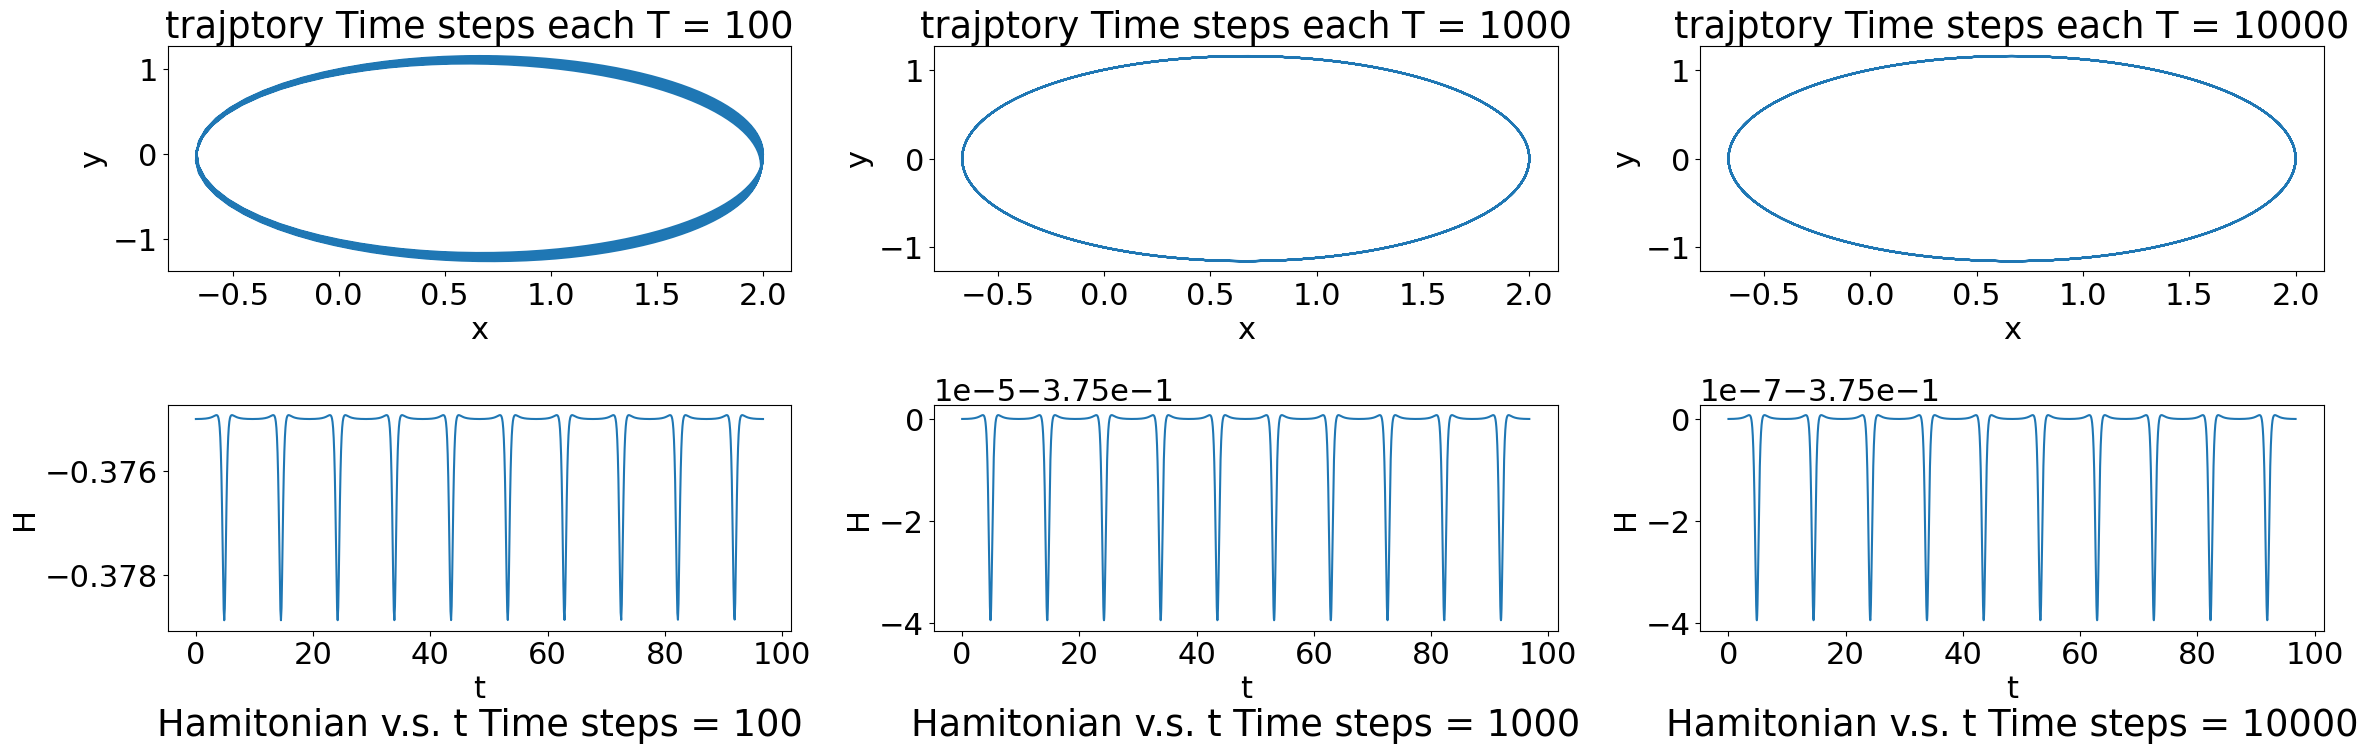

In [126]:
def stoermer_verlet(z,h):
    func = f(z)
    aux = np.array(z)
    aux[:2] = aux[:2] + h/2*func[:2]
    func = f(aux)
    aux[2:] = aux[2:] + h*func[2:]
    func = f(aux)
    aux[:2] = aux[:2] + h/2*func[:2]
    return aux

# parameters and initialization
z0 = np.array([0, 1/2, 2, 0]) #u, v, x, y
T = 2*np.pi*(4/3)**(3/2)
num_rev = 10
time_steps = [100, 1000, 10000]

# Plotting
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2,3, figsize=(24,8))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.1, top=0.9, wspace=0.5, hspace=0.2)

for ind, time_step in enumerate(time_steps):
    total_step = time_step * num_rev
    h = T / time_step

    t = np.arange(0, num_rev * T + h, h)
    sol = np.zeros((4, total_step+1))

    sol[:,0] = z0
    for k in range(total_step):
        sol[:,k+1] = stoermer_verlet(sol[:,k], h)

    axs[0,ind].set_title(f'trajptory Time steps each T = {time_step}')
    axs[0,ind].plot(sol[2,:], sol[3,:])
    axs[0,ind].set_xlabel('x')
    axs[0,ind].set_ylabel('y')

    H = (sol[0,:]**2)/2 + (sol[1,:]**2)/2 - 1/np.sqrt(sol[2,:]**2 + sol[3,:]**2)

    axs[1,ind].set_title(f'Hamitonian v.s. t Time steps = {time_step}', y=-0.5)
    axs[1,ind].plot(t, H)
    axs[1,ind].set_xlabel('t')
    axs[1,ind].set_ylabel('H') 
    plt.tight_layout()

In [123]:
import sympy as sym

def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J


Jacobian('u v x y', ['-x*(x^2+y^2)**(-3/2)','-y*(x^2+y^2)**(-3/2)', 'u', 'v'])
# Jacobian('x y', ['x**2 * y', '5*x + sin(y)'])


Matrix([
[0, 0, 3*x**2/(x**2 + y**2)**(5/2) - 1/(x**2 + y**2)**(3/2),                           3*x*y/(x**2 + y**2)**(5/2)],
[0, 0,                           3*x*y/(x**2 + y**2)**(5/2), 3*y**2/(x**2 + y**2)**(5/2) - 1/(x**2 + y**2)**(3/2)],
[1, 0,                                                    0,                                                    0],
[0, 1,                                                    0,                                                    0]])